# Q: Is my 75+ grandpa in Olomouc or my grandpa in Prague in a bigger risk of dying from COVID-19?

**Q1: Where is he more likely to catch it? Answered: Equally likely in both cities! [previous notebook](00-part-1-grandpa-olomouc-prague-covid.ipynb)**<br>
**Q2: If he caught it, where are people of 75+ more frequently hospitalised? Answered: Equally likely in both cities. [this notebook]**<br>
Q3: If hospitalised, where are people of 75+ more frequently dying?<br>
<br>
Need the following data:<br>
* number of people in O and in P *(got it)*
* incidence in O and in P per number of people in the city *(got it)*
* number of hospitalised 75+ people in Olomouc and in Prague *(cannot get)*
* number of hospitalised people in Olomouc and in Prague *(got it)*
* number of hospitalised deaths in 75+ people in Olomouc and in Prague *(got it)*
* number of deaths in 75+ people in Olomouc and in Prague *(got it)*

TO DO:<br>
* Find out and resolve SettingWithCopy *(done)*
* Find out lau versus orp for exact population and correct *(done)*
* What is the '_7' and its significance? *(done)*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
orp_nazev_Prg = 0
orp_nazev_Olo = 7107
# orp čísluje Správní obvody obcí s rozšířenou působností, nemusejí zatím respektovat území okresů
# https://www.czso.cz/csu/czso/13-7111-04--spravni_obvod_obce_s_rozsirenou_pusobnosti_olomouc#:~:text=Celkovou%20rozlohou%2085%20874%20ha,spr%C3%A1vn%C3%AD%20obvod%20Olomouc%20na%202.
# from 2004
pop_Prg = 1117063
pop_Olo = 158479

In [3]:
df_hos = pd.read_csv('..\\00-source-data\\web_orp_2020-10-11-00-00-36.csv', delimiter=';')
df_hos.head()

,den,datum,orp_kod,orp_nazev,incidence_7,incidence_65_7,incidence_75_7,prevalence,prevalence_65,prevalence_75,aktualni_pocet_hospitalizovanych_osob,nove_hosp_7,testy_7
0,neděle,2020-03-01,2012,Kutná Hora,0,0,0,0,0,0,NaN,0,NaN
1,neděle,2020-03-01,6314,Velké Meziříčí,0,0,0,0,0,0,NaN,0,NaN
2,neděle,2020-03-01,2013,Lysá nad Labem,0,0,0,0,0,0,NaN,0,NaN
3,neděle,2020-03-01,6315,Žďár nad Sázavou,0,0,0,0,0,0,NaN,0,NaN
4,neděle,2020-03-01,2014,Mělník,0,0,0,0,0,0,NaN,0,NaN


In [4]:
df_hos['orp_kod'].nunique()

206

# Q2: Where is he more likely to get hospitalised?

In [5]:
df_hos.dtypes

den                                       object
datum                                     object
orp_kod                                    int64
orp_nazev                                 object
incidence_7                                int64
incidence_65_7                             int64
incidence_75_7                             int64
prevalence                                 int64
prevalence_65                              int64
prevalence_75                              int64
aktualni_pocet_hospitalizovanych_osob    float64
nove_hosp_7                                int64
testy_7                                  float64
dtype: object

In [6]:
df_hos_Olo = df_hos[df_hos['orp_kod']==orp_nazev_Olo].copy()
df_hos_Olo.head()

,den,datum,orp_kod,orp_nazev,incidence_7,incidence_65_7,incidence_75_7,prevalence,prevalence_65,prevalence_75,aktualni_pocet_hospitalizovanych_osob,nove_hosp_7,testy_7
59,neděle,2020-03-01,7107,Olomouc,0,0,0,0,0,0,NaN,0,NaN
216,pondělí,2020-03-02,7107,Olomouc,0,0,0,0,0,0,NaN,0,NaN
471,úterý,2020-03-03,7107,Olomouc,0,0,0,0,0,0,NaN,0,NaN
628,středa,2020-03-04,7107,Olomouc,0,0,0,0,0,0,NaN,0,NaN
883,čtvrtek,2020-03-05,7107,Olomouc,0,0,0,0,0,0,NaN,0,1.0


In [7]:
df_hos_Prg = df_hos[df_hos['orp_kod']==orp_nazev_Prg].copy()
df_hos_Prg.head()

,den,datum,orp_kod,orp_nazev,incidence_7,incidence_65_7,incidence_75_7,prevalence,prevalence_65,prevalence_75,aktualni_pocet_hospitalizovanych_osob,nove_hosp_7,testy_7
182,neděle,2020-03-01,0,Praha,2,1,0,2,1,0,NaN,0,NaN
368,pondělí,2020-03-02,0,Praha,2,1,0,2,1,0,NaN,0,NaN
594,úterý,2020-03-03,0,Praha,3,1,0,3,1,0,NaN,0,2.0
780,středa,2020-03-04,0,Praha,4,1,0,4,1,0,NaN,0,4.0
1006,čtvrtek,2020-03-05,0,Praha,4,1,0,4,1,0,NaN,0,6.0


In [8]:
df_hos_Olo.columns

Index(['den', 'datum', 'orp_kod', 'orp_nazev', 'incidence_7', 'incidence_65_7',
       'incidence_75_7', 'prevalence', 'prevalence_65', 'prevalence_75',
       'aktualni_pocet_hospitalizovanych_osob', 'nove_hosp_7', 'testy_7'],
      dtype='object')

In [9]:
column_names = ['datum', 'nove_hosp_7']

In [10]:
df_hos_Olo_trim = df_hos_Olo[column_names].copy()
df_hos_Olo_trim.tail()

,datum,nove_hosp_7
45381,2020-10-07,27
45534,2020-10-08,30
45793,2020-10-09,31
45946,2020-10-10,29
46205,2020-10-11,25


In [11]:
df_hos_Prg_trim = df_hos_Prg[column_names].copy()
df_hos_Prg_trim.tail()

,datum,nove_hosp_7
45503,2020-10-07,185
45687,2020-10-08,210
45915,2020-10-09,216
46099,2020-10-10,228
46327,2020-10-11,210


In [12]:
df_hos_Olo_trim.dtypes

datum          object
nove_hosp_7     int64
dtype: object

In [13]:
df_hos_Olo_trim['datum'] = df_hos_Olo_trim['datum'].apply(pd.to_datetime)
df_hos_Olo_trim.dtypes

datum          datetime64[ns]
nove_hosp_7             int64
dtype: object

In [14]:
df_hos_Prg_trim['datum'] = df_hos_Prg_trim['datum'].apply(pd.to_datetime)
df_hos_Prg_trim.dtypes

datum          datetime64[ns]
nove_hosp_7             int64
dtype: object

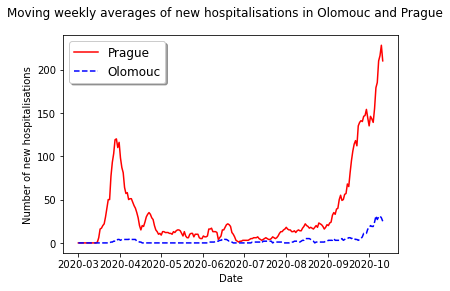

In [15]:
fig, ax = plt.subplots()

ax.plot(df_hos_Prg_trim['datum'], df_hos_Prg_trim['nove_hosp_7'], 'r', label='Prague')
ax.plot(df_hos_Olo_trim['datum'], df_hos_Olo_trim['nove_hosp_7'], 'b--', label='Olomouc')
ax.set_ylabel('Number of new hospitalisations')

legend = ax.legend(loc='upper left', shadow=True, fontsize='large')

fig.suptitle('Moving weekly averages of new hospitalisations in Olomouc and Prague')
plt.xlabel('Date')

plt.show()

# Adjust by pupolation

In [16]:
df_hos_Olo_trim.tail()

,datum,nove_hosp_7
45381,2020-10-07,27
45534,2020-10-08,30
45793,2020-10-09,31
45946,2020-10-10,29
46205,2020-10-11,25


In [17]:
df_hos_Prg_trim.tail()

,datum,nove_hosp_7
45503,2020-10-07,185
45687,2020-10-08,210
45915,2020-10-09,216
46099,2020-10-10,228
46327,2020-10-11,210


In [18]:
df_hos_Olo_trim_extra = df_hos_Olo_trim.copy()
df_hos_Olo_trim_extra.head()

,datum,nove_hosp_7
59,2020-03-01,0
216,2020-03-02,0
471,2020-03-03,0
628,2020-03-04,0
883,2020-03-05,0


In [19]:
df_hos_Olo_trim_extra['nove_hosp_7_adj'] = df_hos_Olo_trim['nove_hosp_7']/pop_Olo
df_hos_Olo_trim_extra.head()

,datum,nove_hosp_7,nove_hosp_7_adj
59,2020-03-01,0,0.0
216,2020-03-02,0,0.0
471,2020-03-03,0,0.0
628,2020-03-04,0,0.0
883,2020-03-05,0,0.0


In [20]:
df_hos_Prg_trim_extra = df_hos_Prg_trim.copy()
df_hos_Prg_trim_extra.head()

,datum,nove_hosp_7
182,2020-03-01,0
368,2020-03-02,0
594,2020-03-03,0
780,2020-03-04,0
1006,2020-03-05,0


In [21]:
df_hos_Prg_trim_extra['nove_hosp_7_adj'] = df_hos_Prg_trim['nove_hosp_7']/pop_Prg
df_hos_Prg_trim_extra.tail()

,datum,nove_hosp_7,nove_hosp_7_adj
45503,2020-10-07,185,0.000166
45687,2020-10-08,210,0.000188
45915,2020-10-09,216,0.000193
46099,2020-10-10,228,0.000204
46327,2020-10-11,210,0.000188


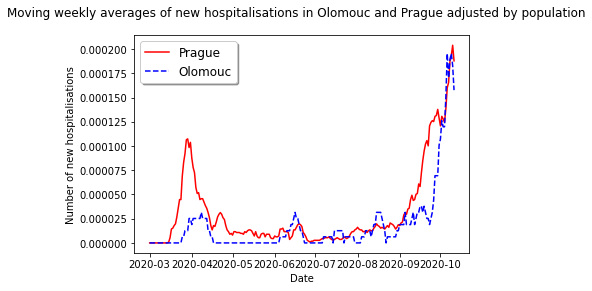

In [22]:
fig, ax = plt.subplots()

ax.plot(df_hos_Prg_trim_extra['datum'], df_hos_Prg_trim_extra['nove_hosp_7_adj'], 'r', label='Prague')
ax.plot(df_hos_Olo_trim_extra['datum'], df_hos_Olo_trim_extra['nove_hosp_7_adj'], 'b--', label='Olomouc')
ax.set_ylabel('Number of new hospitalisations')

legend = ax.legend(loc='upper left', shadow=True, fontsize='large')

fig.suptitle('Moving weekly averages of new hospitalisations in Olomouc and Prague adjusted by population')
plt.xlabel('Date')

plt.show()

# Is this significantly similar? A: Yes.

In [23]:
print(len(df_hos_Prg_trim_extra.index), len(df_hos_Olo_trim_extra.index))

225 225


In [24]:
print(df_hos_Prg_trim_extra.isnull().sum())
print(df_hos_Olo_trim_extra.isnull().sum())

datum              0
nove_hosp_7        0
nove_hosp_7_adj    0
dtype: int64
datum              0
nove_hosp_7        0
nove_hosp_7_adj    0
dtype: int64


In [25]:
df_hos_Prg_trim_extra.dtypes

datum              datetime64[ns]
nove_hosp_7                 int64
nove_hosp_7_adj           float64
dtype: object

In [26]:
import scipy.stats as stats
stats.pearsonr(df_hos_Prg_trim_extra['nove_hosp_7_adj'], df_hos_Olo_trim_extra['nove_hosp_7_adj'])

(0.8388040725544147, 8.289198506547436e-61)

In [27]:
df_merged = pd.merge(df_hos_Prg_trim_extra, df_hos_Olo_trim_extra, how='left', on='datum')
df_merged.tail()

,datum,nove_hosp_7_x,nove_hosp_7_adj_x,nove_hosp_7_y,nove_hosp_7_adj_y
220,2020-10-07,185,0.000166,27,0.000170
221,2020-10-08,210,0.000188,30,0.000189
222,2020-10-09,216,0.000193,31,0.000196
223,2020-10-10,228,0.000204,29,0.000183
224,2020-10-11,210,0.000188,25,0.000158


In [28]:
df_merged = df_merged.rename(columns={'nove_hosp_7_x':'nove_hosp_7_Prg',
                                                  'nove_hosp_7_adj_x':'nove_hosp_7_adj_Prg',
                                                 'nove_hosp_7_y':'nove_hosp_7_Olo',
                                                  'nove_hosp_7_adj_y':'nove_hosp_7_adj_Olo'})
df_merged.tail()

,datum,nove_hosp_7_Prg,nove_hosp_7_adj_Prg,nove_hosp_7_Olo,nove_hosp_7_adj_Olo
220,2020-10-07,185,0.000166,27,0.000170
221,2020-10-08,210,0.000188,30,0.000189
222,2020-10-09,216,0.000193,31,0.000196
223,2020-10-10,228,0.000204,29,0.000183
224,2020-10-11,210,0.000188,25,0.000158


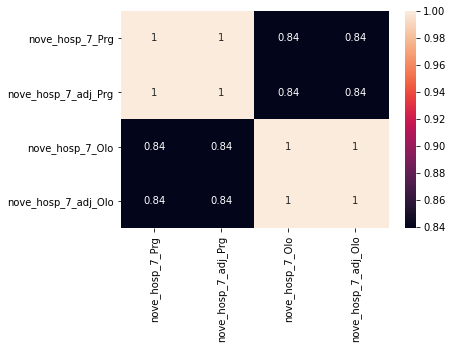

In [29]:
import seaborn as sn
corrMatrix = df_merged.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()